Group XX (Name 1, Name 2, Name 3, Name 4)

# Homework 5

This homework is about $QR$ factorization via the Gram-Schmidt process and eigenvalues/eigenvectors. Let's start with initializations as usual.

In [3]:
import numpy as np                # basic arrays, vectors, matrices
import scipy as sp                # matrix linear algebra 

import matplotlib                 # plotting
import matplotlib.pyplot as plt   # plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

<div class="alert alert-info">

### Gram-Schmidt Process
</div>

In the course, we discussed how the Gram-Schmidt process can be used for the QR decomposition of a matrix. In this exercise, we try this idea by applying it for the solution of a linear system. We can start by generating a random square matrix $A$: 

In [2]:
N = 5
A = np.random.rand(N,N)
print(A)

[[0.68438845 0.98349271 0.77089142 0.02289466 0.30625744]
 [0.43589511 0.72822451 0.28044648 0.75709989 0.47696228]
 [0.10046034 0.67589989 0.55172106 0.34677309 0.07557262]
 [0.04298702 0.07620593 0.26930762 0.17793061 0.22435605]
 [0.65739621 0.183207   0.49830471 0.07420383 0.7375431 ]]


<div class="alert alert-success">

**Task**: Complete the function `factorize_QR` below to implement the QR factorization of a square matrix by the Gram-Schmidt process. The function should have the following properties:

- For the given input matrix $A$, it should return the matrices $Q$ and $R$.
- The diagonal of $R$ should have positive entries.
- It should terminate with error if the columns of $A$ are not linearly independent.
- Note 1: You may use a standard implementation for the scalar product and norm of a vector.
- Note 2: For an orthogonal matrix $Q$ it applies $Q^\top Q = Q Q^\top =I$. You may use it to check the correctness of your implementation.
</div>

In [3]:
def factorize_QR(A):

    m = A.shape[0]
    n = A.shape[1]
    
    Q = np.empty((n, n)) # initialisiere matrix Q
    u = np.empty((n, n)) # initialisiere matrix u

    u[:, 0] = A[:, 0]
    Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])

    for i in range(1, n):

        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] # u vektor 

        Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # q vektor

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            R[i, j] = A[:, j] @ Q[:, i]
    
    return Q, R

Q,R = factorize_QR(A)

Having implemented the QR factorization, we can use it to solve a linear system $A \mathbf{x} = \mathbf{b}$. For the test, we generate a random right hand side vector $\mathbf{b}$:

In [4]:
b = np.random.rand(N)
print(b)

[0.40913909 0.85273337 0.25287513 0.97477897 0.95784611]


If we substitute $A = QR$ into the linear system we get 
\begin{equation}
QR \mathbf{x} = \mathbf{b}.
\end{equation}
If we multiply both sides with $Q^{-1}$ from the left, we get
\begin{equation}
Q^{-1} QR \mathbf{x} = Q^{-1} \mathbf{b}.
\end{equation}
Since $Q^{-1} Q = I$, we have
\begin{equation}
R \mathbf{x} = Q^{-1} \mathbf{b},
\end{equation}
which can be solved easily by the backward substitution method that you have already implemented in the previous exercises.

<div class="alert alert-success">

**Task**: Complete the function `solve_with_QR` below, which solves a linear equation system $A\mathbf{x} = \mathbf{b}$ using the QR factorization. 

- For the given QR factorization of $A$, it should return the solution $\mathbf{x}$.
- Note 1: You may use a standard implementation for the matrix-matrix product.
- Note 2: It should be clear by now how to invert $Q$ easily.
</div>

In [5]:
def solve_with_QR(Q,R,b):
    # TO DO
    
    C = np.transpose(Q)
    y = np.matmul(C , b)
    
    n = len(b)
    x = np.zeros(n)
    x[n-1] = b[n-1]/R[n-1, n-1]
    for i in range(n-1,-1,-1):
        Sum = b[i]
        for j in range(i+1,n):
            Sum = Sum - R[i,j] * x[j]
        x[i] = Sum / R[i,i]    
    
    return x

As usual, we check the implementation by calculating the residual:

In [6]:
x = solve_with_QR(Q,R,b)
r = b - np.matmul(A,x)
print(r)

[ 0.22475446 -0.07016342 -0.17711551 -0.31565812  1.25834908]


Even though the Gram-Schmidt process is easy to understand and implement, it may suffer from numerical errors for larger matrices. Below we demonstrate such a case, for which the Gram-Schmidt process shows an unstable behaviour. We first generate a random square matrix $A$ with $n=50$:

In [25]:
N = 50;
A = np.random.rand(N,N)
Q, R = np.linalg.qr(A)

After applying the QR factorization to $A$, we modify then the diagonal elements of $R$ such that they are decaying exponents of $2$: 

In [19]:
# we modify the main diagonal of R
for i in range(N):
    R[i,i] = 2**(-i)
    

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06
 9.53674316e-07 4.76837158e-07 2.38418579e-07 1.19209290e-07
 5.96046448e-08 2.98023224e-08 1.49011612e-08 7.45058060e-09
 3.72529030e-09 1.86264515e-09 9.31322575e-10 4.65661287e-10
 2.32830644e-10 1.16415322e-10 5.82076609e-11 2.91038305e-11
 1.45519152e-11 7.27595761e-12 3.63797881e-12 1.81898940e-12
 9.09494702e-13 4.54747351e-13 2.27373675e-13 1.13686838e-13
 5.68434189e-14 2.84217094e-14 1.42108547e-14 7.10542736e-15
 3.55271368e-15 1.77635684e-15]


We then reconstruct a modified $A$ matrix from $Q$ and $R$

In [24]:
A = Q@R

<div class="alert alert-success">

**Task**: Apply QR factorization to the modified matrix $A$ by the Gram-Schmidt process. Compare the exact values of the main diagonal $R$ with the values obtained from the Gram-Schmidt process in a plot. 
</div>

In [18]:
# TO DO
factorize_QR(A)
#print(A)
print(R.diagonal())

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06
 9.53674316e-07 4.76837158e-07 2.38418579e-07 1.19209290e-07
 5.96046448e-08 2.98023224e-08 1.49011612e-08 7.45058060e-09
 3.72529030e-09 1.86264515e-09 9.31322575e-10 4.65661287e-10
 2.32830644e-10 1.16415322e-10 5.82076609e-11 2.91038305e-11
 1.45519152e-11 7.27595761e-12 3.63797881e-12 1.81898940e-12
 9.09494702e-13 4.54747351e-13 2.27373675e-13 1.13686838e-13
 5.68434189e-14 2.84217094e-14 1.42108547e-14 7.10542736e-15
 3.55271368e-15 1.77635684e-15]


<div class="alert alert-info">
    
### Graph Laplacian and Spectral Clustering
</div>

Via adjacency matrices, graphs have a deep connection to linear algebra. In this exercise, to goal is to use eigenvalues and eigenvectors of the so-called *Graph Laplacian* matrix to do some data analysis. Specifically, we will consider clustering, i.e. partitioning a data set into disjoint classes.

Let's load a test data set consisting of two-dimensional points to illustrate the problem.

<div class="alert alert-danger">
    
**Note:** Please download the file `pointcloud.npz` from the OLAT materials folder, and put it in the same directory as this notebook.
</div>

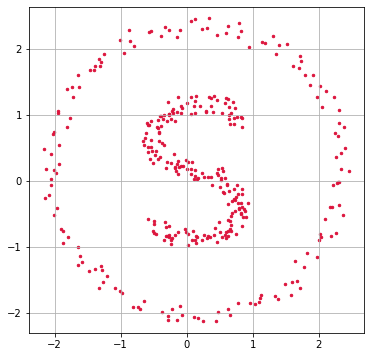

In [4]:
X = np.load("pointcloud.npz")["data"]

plt.figure(figsize=(6,6))
plt.scatter( X[:,0], X[:,1], 6.0, color="crimson" )
plt.axis("equal")
plt.grid()

The challenge in clustering is to separate meaningful classes among the data items; in this case, we would like to separate the points forming the "S" in the middle from the points forming the surrounding circle. We will use a technique called **spectral clustering** to achieve this.

The first step is to create an undirected graph $G = (X,E)$ from the data points as follows. $X$ are the vertices of the graph, whose two coordinates are stored in the two columns of the matrix `X`. There is an edge connecting any two (different) points whose (Euclidean) distance is lower than a given threshold $C > 0$, e.g. for $C=1$:

$$
\{ x_i, x_j \} \in E \ \Leftrightarrow \|x_i - x_j\|_2 < 1.
$$

Undirected graphs can be represented via an adjacency matrix, i.e. a matrix $A \in \mathbb{R}^{n\times n}$, where $n$ is the number of data points. Here, $n = 350$. $A$ is given by

$$
A_{ij} =
\begin{cases}
1 & \text{if $\{ x_i, x_j \} \in E \ \Leftrightarrow\ \|x_i - x_j\|_2 < 1$}\\
0 & \text{otherwise.}
\end{cases}
$$

Clearly, since $G$ is undirected, $A$ is symmetric.

<div class="alert alert-success">

**Task:** Write a function to compute the adjacency matrix $A$ as defined above.

Note: the entries of $A$ should be either $1$ or $0$, the diagonal entries $A_{ii}$ should be zero, and the result should be symmetric. 
</div>

In [21]:
def compute_graph( X ):
    """compute the adjacency matrix of the graph over the vertices X as given above"""
    n = 350
    A = np.zeros((n, n))

    
    for i in range(n):
        for j in range(n):
            #Punkt i - Punkt j (x&y-Koordinate)
            Dist = X[i] - X[j]
            
            #euklidische Norm & Eintrag in A
            if np.sqrt(Dist[0]**2 + Dist[1]**2) < 1:
                A[i, j] = 1
                
            #Diagonale 0 setzen
            if Dist.all() == 0:
                A[i, j] = 0
            
    return A


A = compute_graph(X)

Let's inspect the resulting graph using the following function.

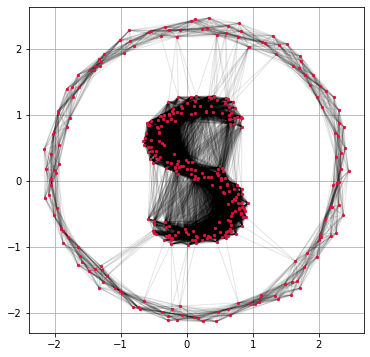

In [19]:
def plot_graph( axes, X, A, color=None ):
    """create a plot of the graph with 2D vertices X and adjacency matrix A"""
    
    from matplotlib.collections import LineCollection

    segs = []
    for i, row in enumerate(A):
        for j, a in enumerate(row):
            if a > 0:
                segs.append( [X[i,:], X[j,:]] )

    lc = LineCollection(segs, linewidths=1.0, alpha=0.05, color='black')
    
    if color is None:
        color = 'crimson'
    
    axes.scatter(X[:,0], X[:,1], 5.0, c=color, cmap='autumn', antialiased=True, zorder=5 )
        
    axes.add_artist(lc)
    axes.axis('equal')
    axes.grid()

plt.figure(figsize=(6,6))
plot_graph(plt.gca(), X, A)

As we can see, there are many edges formed within the "S" part and the circle part, but few edges between them.

The adjacency matrix $A$ can be inspected graphically using a so-called spy plot. This shows only the non-zero entries of $A$.

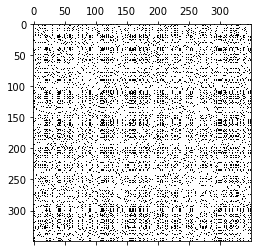

In [17]:
plt.spy( A )

As we can see, the matrix is very sparsely populated, i.e. there are few non-zero entries, and these are scattered all over the matrix.

The idea behind separating the two parts of the dataset is to now form a so-called graph cut. In essence, this means that we want to separate the data points into two classes $X = X_1 \mathbin{\unicode{x228D}} X_2$ and remove all edges between vertices in $X_1$ and $X_2$.

While the assignment of each vertex to either $X_1$ or $X_2$ is in principle arbitrary, we can associate with each such cut a cost measure. If we choose $X_1$, then $X_2 = X \setminus X_1$. 

Let now $E(X,Y)$ denote the number of edges between vertices in $X$ and vertices in $Y$, then the **normalized cut** for a particular choice of $X_1$ is given as:

$$
\mathrm{ncut}_{X_1} = \frac{|E(X_1,X_2)|}{|E(X_1,X)|} + \frac{|E(X_1,X_2)|}{|E(X_2,X)|}
$$

The above formula measures how many edges are cut by the partition, relative to the overall number of edges among vertices of $X$, $X_1$, and $X_2$, respectively. An optimal separation, called a **minimal cut**, minimizes $\mathrm{ncut}_{X_1}$ over all choices of $X_1$.

While one could exhaustively try out all possible choices of $X_1$, there is an elegant connection to linear algebra.

By a complex mathematical derivation that is not of too much interest here (but is given [here](https://en.wikipedia.org/wiki/Segmentation-based_object_categorization#Segmentation_using_normalized_cuts)) the minimal normalized cut, i.e. the best partition of $X$ that cuts the fewest edges, can be obtained from the eigenvector corresponding to the _smallest non-zero eigenvalue_ of the graph Laplacian $L$, given by 

$$
L_{ij} = \begin{cases}
\mathrm{deg}(v_i) & \text{if $i = j$} \\
-1 & \text{if $\{v_i, v_j\} \in E$} \\
0 & \text{otherwise}
\end{cases}
$$

where $\mathrm{deg}(v_i)$ is the degree of $v_i$, that is the number of edges connected to $v_i$. 

$L$ can also be computed more compactly as $L = D - A$, where $A$ is the adjacency matrix as above and $D$ is the diagonal degree matrix, $D_{ii} = \mathrm{deg}(v_i)$.

<div class="alert alert-success">

**Task:** Write a function to compute the graph Laplacian $L$ as given above, and visualize the result using a spy plot.

Hint: The number of edges connecting to $v_i$ is the sum of entries in the $i$-th row or column of $A$.

Note: the entries of $L$ should be either $0$, $-1$ or a positive integer, and $L$ should be symmetric. 
</div>

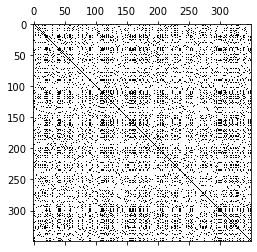

In [23]:
def graph_laplacian( A ):
    """compute the graph Laplacian matrix of the graph given by adjacency matrix A"""
    # TO DO
    n = 350
    D = np.zeros((n, n))
    
    #number of edges connecting to vi
    for i in range(n):
        D[i, i] = sum(A[i])
    
    L = D - A
    
    return L


L = graph_laplacian(A)
plt.spy(L)

In the spy plot, $L$ has the nearly the same pattern (called *sparsity structure*) as $A$; they only differ in the diagonal, where $A$ had zero entries.

Let's next compute the smallest non-zero eigenvalue of $L$.

<div class="alert alert-success">

**Task**: Write a function to return the smallest non-zero eigenvalue of $L$, given the eigenvalues and corresponding eigenvectors in two arrays `vals` and `vecs`. 

Notes: 
- The input to your function is generated by [`numpy.linalg.eig`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html), which compute the eigenvalues and eigenvectors of $L$, in unsorted order.
- Set the eigenvalues that are numerically close to zero ($< 10^{-9}$) to a very large number (e.g. $10^9$).
- Sort the eigenvalues/eigenvectors from smallest to largest. Use [`numpy.argsort`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html) function, which instead of sorting an array directly, returns an array of indices such that the input is in sorted order.
- Return the eigenvector corresponding to the now left over smallest eigenvalue (i.e. the column of `vals` with the same index as the smallest eigenvalue).
</div>

In [ ]:
def smallest_nonzero_eigenvector(vals, vecs):
    """return the eigenvector to the smallest non-zero eigenvalue of the input L"""
    # TODO
    

vals, vecs = np.linalg.eig(L)
val_min, vec_min = smallest_nonzero_eigenvector(vals, vecs)

print("smallest non-zero eigenvalue:", val_min)

If everything is correct, the smallest non-zero eigenvalue should be approximately $0.4$.

The components of the eigenvector can be interpreted as a function that assigns a real number to every vertex, and `vec_min[i]` is the function value for vertex $v_i$. Let's visualize this function; thankfully, `plot_graph` already supports this through an optional `color` argument.

In [ ]:
plt.figure(figsize=(6,6))
plot_graph(plt.gca(), X, A, color=np.real(vec_min))

Mission accomplished! This process is called **spectral clustering**. ("Spectral" indicates that this technique is related to eigenvalue analysis.) High function values ($> 0$, yellowish) correspond to the set $X_1$ – the "S" -- while low function values ($\leq 0$, reddish) correspond to the other set $X_2$, the surrounding circle.

If everything is correct, the image should look roughly like this (possibly with reversed colors):

In [ ]:
plt.figure(figsize=(6,6))
plot_graph(plt.gca(), X, A, color=(np.linalg.norm(X, axis=1) < 1.5)) 

(Of course this trivial separation of points by radius would not work in the general case, but it works well for this test case.)

One more thing: we can reorder the vertices of the graph such that the vertices in $X_1$ are before those of $X_2$. This does interesting things to the adjacency matrix:

In [ ]:
idx = np.argsort(vec_min > 0)
plt.spy( A[idx].T[idx] );

As we can see, this reorders the adjacency matrix into two large blocks, with a minimal number of entries outside these blocks. The latter are exactly the edges that are cut by the minimal cut above.